# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error


## Exploratory Data Analysis 

In [ ]:
# Lectura datos, relación variables, mapas de correlación...

In [ ]:
# Utiliza todas las celdas que necesites...

In [3]:
df = pd.read_csv('data/Advertising.csv', index_col=0)
df.head()

,TV,radio,newpaper,sales
0,230.1,37.8,6s9.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [6]:
df['newpaper'] = df['newpaper'].str.replace("s","")
df['newpaper'] = df['newpaper'].astype(float)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   radio     200 non-null    float64
 2   newpaper  200 non-null    float64
 3   sales     200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
df.describe()

,TV,radio,newpaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


In [10]:
df.head()

,TV,radio,newpaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


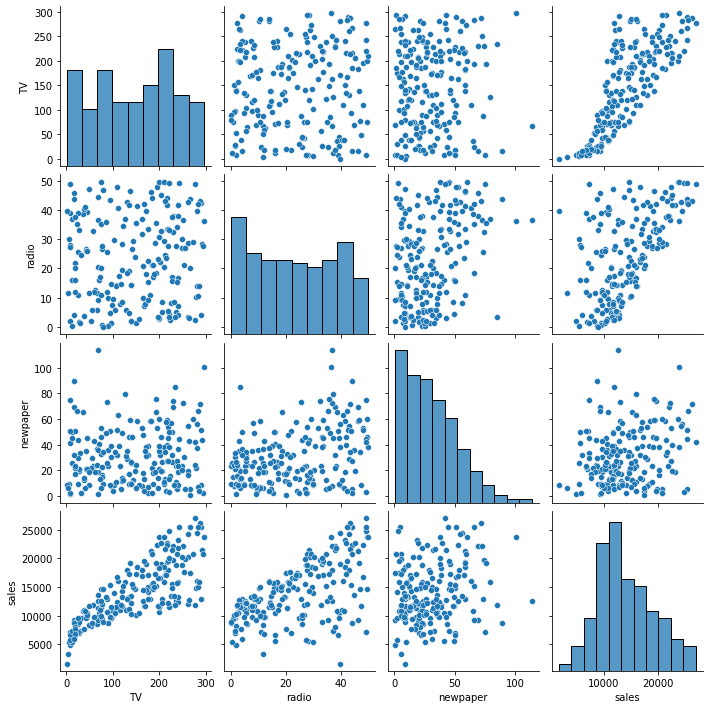

In [11]:
sns.pairplot(df)

<AxesSubplot:>

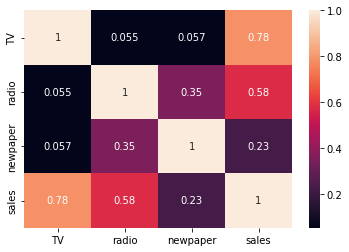

In [12]:
sns.heatmap(df.corr(), annot=True)

## Modelado

In [ ]:
# Manipulación datasets, entrenamiento, evaluación, nuevas iteraciones... Prueba modelos sin y con regularización.

In [ ]:
# Utiliza todas las celdas que necesites...

In [168]:
X = df.drop(columns=["sales"])
y = df['sales']

In [105]:
X = df[['TV', 'radio']]
y = df['sales']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [107]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 2)
(40, 2)
(160,)
(40,)


In [108]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 1888.9112959614213
MSE test 6697131.7332439665


In [172]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [110]:
lr = LinearRegression()

lr.fit(X_train_scal, y_train)

y_pred = lr.predict(X_test_scal)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 1888.9112959614217
MSE test 6697131.733243969


In [111]:
ridge = Ridge(alpha=1)

ridge.fit(X_train_scal, y_train)

y_pred = ridge.predict(X_test_scal)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 1899.8379069830335
MSE test 6725201.581849267


In [112]:
n_alphas = 100

alphas = np.logspace(-4,2,n_alphas)

err_ridge = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scal, y_train)
    y_pred = ridge.predict(X_test_scal)
    err_ridge.append(mean_absolute_error(y_pred, y_test))


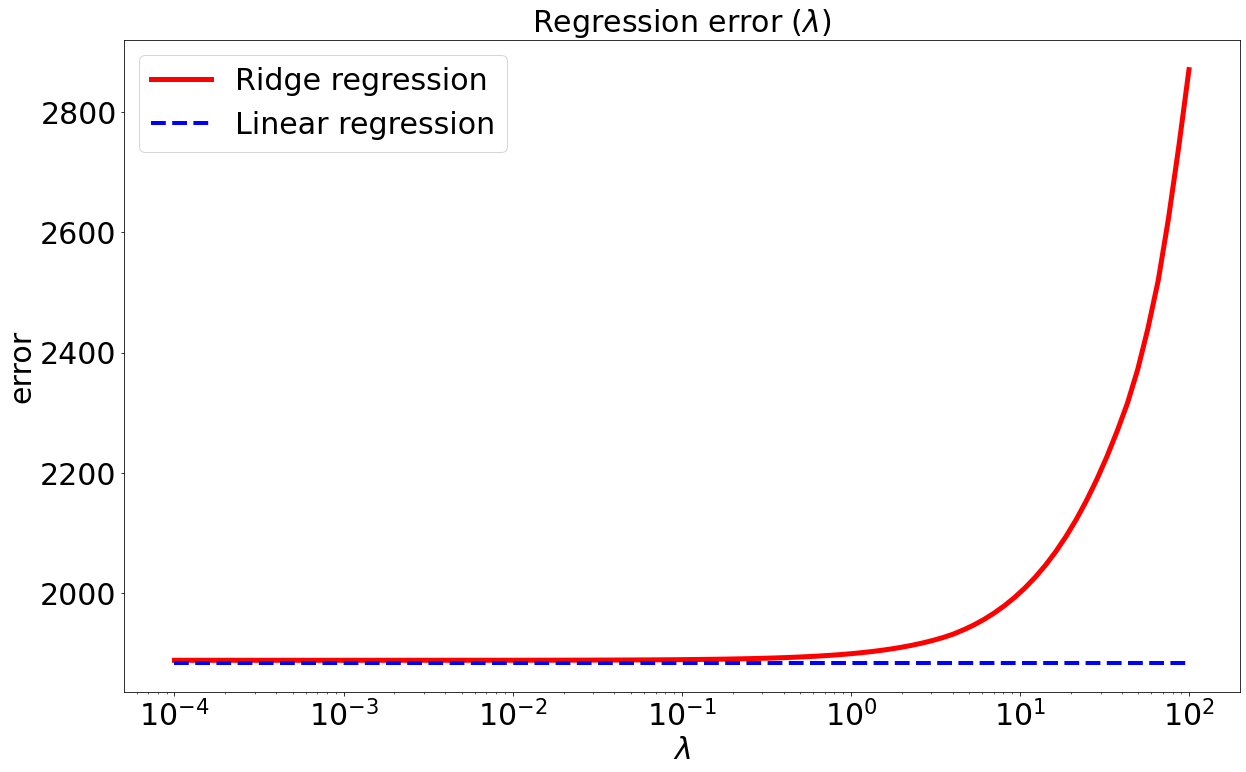

In [113]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, [1885]*100, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [114]:
lasso = Lasso(alpha=1)

lasso.fit(X_train_scal, y_train)

y_pred = lasso.predict(X_test_scal)

print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 1889.4449181554287
MSE test 6698188.896883783


In [115]:
n_alphas = 100

alphas = np.logspace(-4,2,n_alphas)

err_lasso = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train_scal, y_train)
    y_pred = lasso.predict(X_test_scal)
    err_lasso.append(mean_absolute_error(y_pred, y_test))


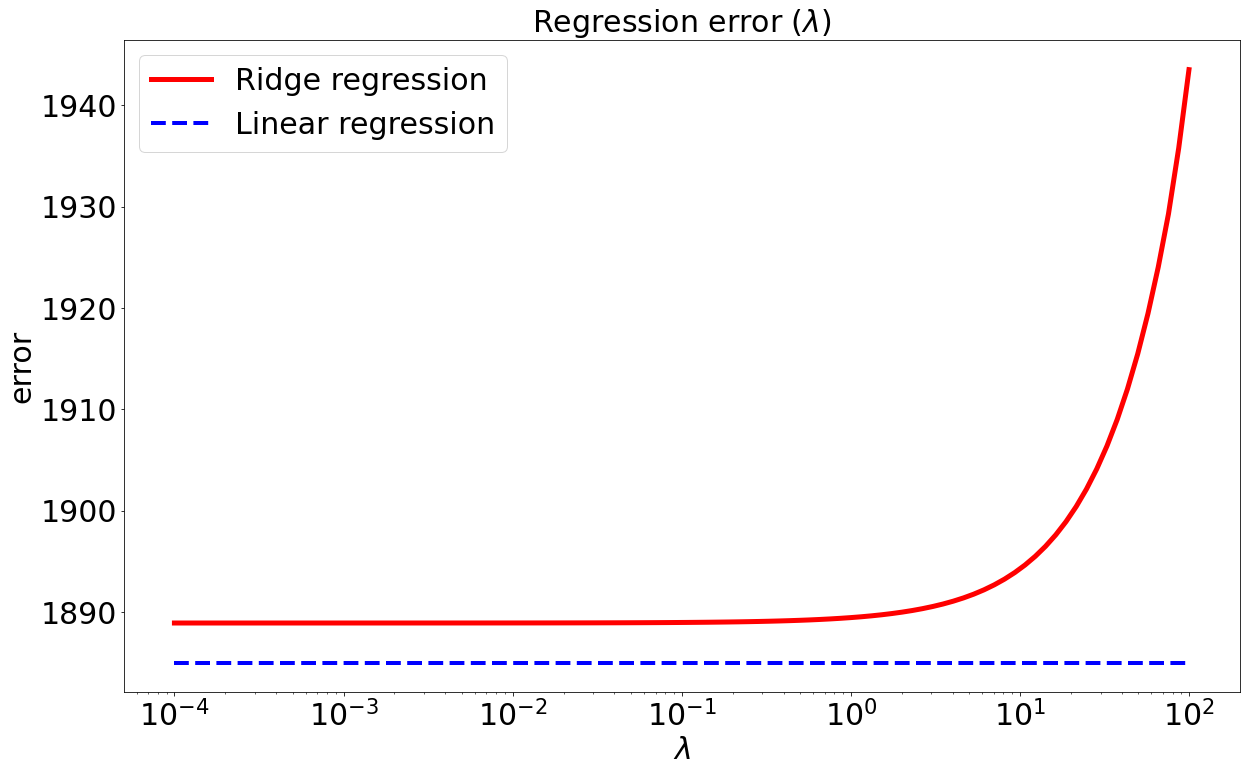

In [116]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, [1885]*100, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [117]:
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train_scal)
X_poly_train = poly_reg.transform(X_train_scal)
X_poly_test = poly_reg.transform(X_test_scal)

In [118]:
pol_reg2 = LinearRegression()
pol_reg2.fit(X_poly_train,y_train)

y_pred = pol_reg2.predict(X_poly_test)


print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 502.3628398493139
MSE test 950674.6654612415


In [119]:
poly_reg = PolynomialFeatures(degree=3)
poly_reg.fit(X_train_scal)
X_poly_train = poly_reg.transform(X_train_scal)
X_poly_test = poly_reg.transform(X_test_scal)

In [120]:
pol_reg3 = LinearRegression()
pol_reg3.fit(X_poly_train,y_train)

y_pred = pol_reg3.predict(X_poly_test)


print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 459.12450769340575
MSE test 707179.6692101678


In [158]:
poly_reg = PolynomialFeatures(degree=4)
poly_reg.fit(X_train_scal)
X_poly_train = poly_reg.transform(X_train_scal)
X_poly_test = poly_reg.transform(X_test_scal)

In [159]:
pol_reg4 = LinearRegression()
pol_reg4.fit(X_poly_train,y_train)

y_pred = pol_reg4.predict(X_poly_test)


print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 402.94531141349137
MSE test 566496.1895070456


In [156]:
poly_reg = PolynomialFeatures(degree=5)
poly_reg.fit(X_train_scal)
X_poly_train = poly_reg.transform(X_train_scal)
X_poly_test = poly_reg.transform(X_test_scal)

In [157]:
pol_reg5 = LinearRegression()
pol_reg5.fit(X_poly_train,y_train)

y_pred = pol_reg5.predict(X_poly_test)


print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 455.7461194341633
MSE test 588155.8525059434


In [52]:
poly_reg = PolynomialFeatures(degree=6)
poly_reg.fit(X_train_scal)
X_poly_train = poly_reg.transform(X_train_scal)
X_poly_test = poly_reg.transform(X_test_scal)

In [53]:
pol_reg6 = LinearRegression()
pol_reg6.fit(X_poly_train,y_train)

y_pred = pol_reg6.predict(X_poly_test)


print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 2148.68125
MSE test 51226472.45237732


In [152]:
poly_reg = PolynomialFeatures(degree=4)
poly_reg.fit(X_train_scal)
X_poly_train = poly_reg.transform(X_train_scal)
X_poly_test = poly_reg.transform(X_test_scal)

In [153]:
pol_reg4 = Lasso(alpha=0.1, max_iter = 10000)
pol_reg4.fit(X_poly_train,y_train)

y_pred = pol_reg4.predict(X_poly_test)


print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 402.95104578585807
MSE test 566024.5106638666


In [145]:
poly_reg = PolynomialFeatures(degree=5)
poly_reg.fit(X_train_scal)
X_poly_train = poly_reg.transform(X_train_scal)
X_poly_test = poly_reg.transform(X_test_scal)

In [150]:
pol_reg5 = Lasso(alpha=25, max_iter = 10000)
pol_reg5.fit(X_poly_train,y_train)

y_pred = pol_reg5.predict(X_poly_test)


print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 422.9826220996225
MSE test 521224.69103231526


## Resultados

In [ ]:
# Interpreta, resume y destaca los puntos importantes de los resultados.

In [ ]:
# Utiliza todas las celdas que necesites...

El modelo elegido con todas las variables ha sido una PR5 + regularización de Lasso, porque es el modelo que ante datos nuevos (Test) es el que menor error obtenemos

In [178]:
model = Lasso(alpha=15, max_iter = 10000)
model.fit(X_poly_train,y_train)

y_pred = model.predict(X_poly_test)


print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 378.9835319617359
MSE test 417119.00245317875


Si queremos reducir el número de variables, escogiendo solo TV y Radio el mejor modelo ha sido una PR4 sin regularizción.

In [160]:
poly_reg = PolynomialFeatures(degree=4)
poly_reg.fit(X_train_scal)
X_poly_train = poly_reg.transform(X_train_scal)
X_poly_test = poly_reg.transform(X_test_scal)

In [161]:
pol_reg4 = LinearRegression()
pol_reg4.fit(X_poly_train,y_train)

y_pred = pol_reg4.predict(X_poly_test)


print("MAE test", mean_absolute_error(y_test, y_pred))
print("MSE test", mean_squared_error(y_test, y_pred))

MAE test 402.94531141349137
MSE test 566496.1895070456


In [179]:
poly_reg = PolynomialFeatures(degree=5)
poly_reg.fit(X_train_scal)
X_poly_train = poly_reg.transform(X_train_scal)
X_poly_test = poly_reg.transform(X_test_scal)

In [182]:
new_data = [[151.5,	41.3,	58.5]]
new_data_scal = scaler.transform(new_data)
new_data_pol = poly_reg.transform(new_data_scal)

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [183]:
predictions = model.predict(new_data_pol)
predictions

array([18285.68617374])